In [1]:
import numpy as np
import matplotlib.image as Image
import matplotlib.pyplot as plt
np.random.seed(42)

In [2]:
path = './pictures/cloud.jpg'

In [3]:
img = Image.imread(path)

In [4]:
canvas = np.zeros_like(img)

In [5]:
max_population = 10

# Parameters

## X-Pos, Y-Pos, R, G, B, Radius, Opakeness

In [6]:
class Creature:
    def __init__(self,canvas):
        '''Accepts a canvas or Image as input,
        Returns a Circle-Mask-Object with functions.'''
        if not type(canvas) == type(np.array([0])): raise TypeError('Canvas must be of type np.array.')
        if not len(canvas.shape) == 3 and canvas.shape[2] == 3: raise TypeError('Canvas must have 3 Color-Chanels. Canvas.shape = (x, y, 3)')
        
        #creature parameters
        self.canvas = canvas
        self.h, self.w, _ = canvas.shape
        self.y, self.x = np.arange(0, self.h), np.arange(0, self.w)
        self.mask = np.zeros_like(canvas, dtype=bool)
        self.blank_canvas = self.mask
        self.fitness = -1
        
        #creature genes
        self.r = np.random.randint(0,255)
        self.g = np.random.randint(0,255)
        self.b = np.random.randint(0,255)
        self.x_pos = np.random.randint(0,self.w)
        self.y_pos = np.random.randint(0,self.h)
        self.px_radius = np.random.randint(1,max(canvas.shape[:2]))
        self.opakeness = np.random.rand()
        
        #Calculate Mask
        Y, X = np.ogrid[:self.h, :self.w]
        dist_from_center = np.sqrt((X - self.x_pos)**2 + (Y - self.y_pos)**2)
        self.mask = dist_from_center <= self.px_radius
        
    def __str__(self):
        '''String-Representation of Object when printing the Object'''
        return 'Mask Object to produce a circle-mask based on a image'

    def applyMaskToCanvas(self,canvas):
        orig = canvas[self.mask]
        new = np.ones_like(orig)*(self.r,self.g,self.b)
        canvas[self.mask] = np.array(orig*(1-self.opakeness)+new*self.opakeness, dtype=np.uint8)
        return canvas
    
    def getFitness(self):
        return self.fitness
    
    def setFitness(self,fitness):
        self.fitness = fitness

In [7]:
class Fittness:
    def __init__(self,path):
        self.picture = Image.imread(path)
        self.picture.setflags(write=1)
        self.picture[self.picture>127] = 255 - self.picture[self.picture>127]
        self.max_err = np.sum(np.square(self.picture))
        self.picture = Image.imread(path)
        
    def MSE(self, canvas):
        # the 'Mean Squared Error' between the two images is the
        # sum of the squared difference between the two images;
        # NOTE: the two images must have the same dimension
        err = np.sum((self.picture.astype("float") - canvas.astype("float")) ** 2)
        err /= float(canvas.shape[0] * canvas.shape[1])
        return err
    
    def calcSimilarity(self,picture):
        mse = self.MSE(picture)
        sim = (self.max_err-mse)/self.max_err
        return sim

In [8]:
fitness = Fittness(path)

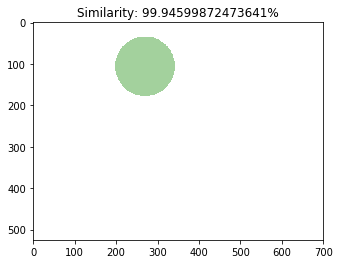

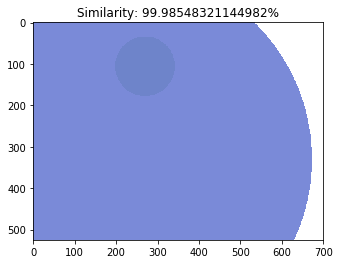

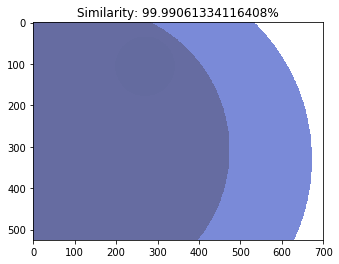

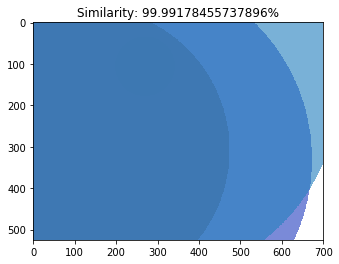

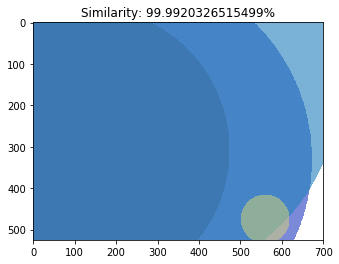

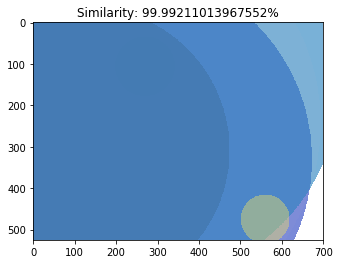

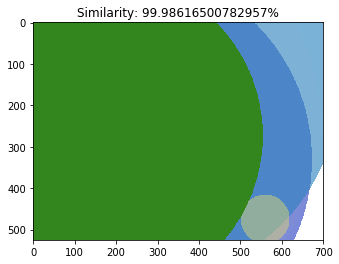

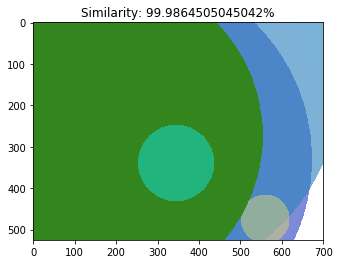

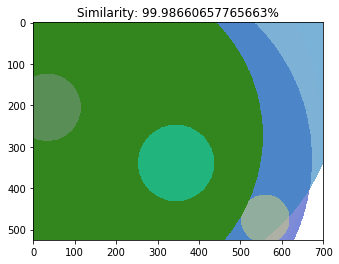

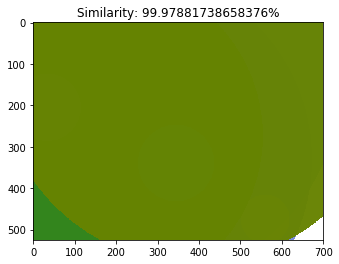

In [9]:
canvas = np.ones_like(img)*255
population = [Creature(img) for _ in range(max_population)]
for c in population:
    canvas = c.applyMaskToCanvas(canvas)
    c_fitness = fitness.calcSimilarity(canvas)
    plt.imshow(canvas)
    plt.title('Similarity: '+ str(c_fitness*100)+ '%')
    plt.show()

In [10]:
fitness.calcSimilarity(img)

1.0